# Tensorflow Tutorial

Welcome to the tensorflow tutorial! We will try building a binary classifier. But first, you will need to know a bit more about neural networks

## 1. Import Packages

Here are some new libraries needed:
* [numpy](https://docs.scipy.org/doc/numpy/reference/)
* [matplotlib](https://matplotlib.org/3.1.1/contents.html) - for plotting graphs
* [scipy](https://www.scipy.org/) - for importing images
* [PIL](https://pillow.readthedocs.io/) - Python Imaging Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2. The Problem

We will be using the Kaggle Cat and Dog dataset to create a binary classification model. This model will identify cats and dogs. To do this, let's first load the dataset. We will define a function to load the data, and for each image we will resize it to 224 by 224 pixels and convert it into a numpy array. 
Optional: You can print the array to see what the data looks like

### 2.1 Load data

In [4]:
import glob

def load_images(globpath, my_list, my_labels, num):
    for image in globpath:
        with open(image, 'rb') as file:
            img = Image.open(file)
            img = img.resize((128, 128)) #this is the size we want the image to be in
            np_img = np.array(img)       #converting this image into a numpy array
            my_list.append(np_img)
            my_labels.append(num)

def load_test_images(globpath, my_list, my_labels, num):
    for image in globpath:
        with open(image, 'rb') as file:
            img = Image.open(file)
            img = img.resize((128, 128)) #this is the size we want the image to be in
            np_img = np.array(img)       #converting this image into a numpy array
            my_list.append(np_img)
            my_labels.append(num)

In [7]:
#load the training set
training_set = []
training_labels = []
load_images(glob.glob("cat-and-dog/training_set/cats/*.jpg"), training_set, training_labels, 0)
load_images(glob.glob("cat-and-dog/training_set/dogs/*.jpg"), training_set, training_labels, 1)
print(len(training_set))

2000


In [8]:
#load the test set
test_set = []
test_labels = []
load_test_images(glob.glob("cat-and-dog/test_set/cats/*.jpg"), test_set, test_labels, 0)
load_test_images(glob.glob("cat-and-dog/test_set/dogs/*.jpg"), test_set, test_labels, 1)
print(len(test_set))

400


### 2.2 Shuffle Data

In [5]:
#randomly shuffle the dataset
p = np.random.permutation(len(training_labels))
X_train_orig = np.array(training_set)[p]
Y_train = np.expand_dims(np.array(training_labels)[p], axis=1).T

In [6]:
p = np.random.permutation(len(test_labels))
X_test_orig = np.array(test_set)[p]
Y_test = np.expand_dims(np.array(test_labels)[p], axis=1).T

### 2.3 Standardize Data

In [7]:
#standardize the images, 255 is the maximun RBG value
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T / 255
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T /255

Now we have a training set of X_train and Y_train, as well as a test set of X_test and Y_test. Remember that these are all numpy arrays, and for X, they have dimensions (*hint* which is a tuple) of (m, num_pixels, num_pixels, 3), and for Y, a dimension of (m,). m is the number of training examples. Try finding the following values:

In [8]:
### START ###
m_train = np.shape(X_train)[0]
m_test = np.shape(X_test)[0]
num_px = np.shape(X_train_orig)[1]
### END ###
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(Y_test.shape))

Number of training examples: m_train = 49152
Number of testing examples: m_test = 49152
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (49152, 2000)
train_set_y shape: (1, 2000)
test_set_x shape: (49152, 400)
test_set_y shape: (1, 400)


Your output should be:
```
Number of training examples: m_train = 49152
Number of testing examples: m_test = 150528
Height/Width of each image: num_px = 2000
Each image is of size: (2000, 2000, 3)
train_set_x shape: (49152, 2000)
train_set_y shape: (2000,)
test_set_x shape: (150528, 400)
test_set_y shape: (400,)
```

## 3. Let's Build the Functions
Now that we have our data loaded, we can start building the functions needed to create a model.

### 3.1 Helper Function
Use your code from the first notebook to implement a sigmoid activation function. The backwards function should be the following:

$$sigmoid = 1 / (1 + e^x)$$
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

In [9]:
def sigmoid(z):
    ### START ###
    s = 1 / (1 + np.exp(-z))
    ### END ###
    return s, z

In [10]:
def relu(z):
    ### START ###
    s = np.maximum(z, 0)
    ### END ###
    return s, z

In [11]:
def sigmoid_backwards(dA, cache):
    ### START ###
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    ### END ###
    return dZ

In [12]:
def relu_backwards(dA, cache):
    # When z <= 0, you should set dz to 0 as well. 
    ### START ###
    Z = cache
    dZ = np.array(dA, copy=True)
    ### END ###
    return dZ

In [13]:
print(str(sigmoid(np.array([1, 2]))))
print(str(relu(np.array([1, -1]))))
print(str(sigmoid_backwards(np.array([1, -1]), np.array([[0, 1]]))))
print(str(relu_backwards(np.array([1, -1]), np.array([[0, 1]]))))

(array([0.73105858, 0.88079708]), array([1, 2]))
(array([1, 0]), array([ 1, -1]))
[[ 0.25       -0.19661193]]
[ 1 -1]


Your output should be
```
(array([0.73105858, 0.88079708]), array([1, 2]))
(array([1, 0]), array([ 1, -1]))
[[ 0.25       -0.19661193]]
[ 1 -1]
```

### 3.2 Initialize Parameters
Now we're going to create a function that initializes the weight (W) and the bias (b) as zeros. *hint: Numpy has a function that can help you with the weight* This function should return a dictionary parameters with W1 W2 b1 and b2

In [14]:
def initialize_parameters(layer_dims):
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [15]:
parameters_ = initialize_parameters([1,2,3])
print(parameters_)

{'W1': array([[ 1.62434536],
       [-0.61175641]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.37347383, -0.75870339],
       [ 0.6119356 , -1.62743362],
       [ 1.23376823, -0.53825456]]), 'b2': array([[0.],
       [0.],
       [0.]])}


The function should return
```
{'W1': array([[0.01788628],
       [0.0043651 ]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 0.00096497, -0.01863493],
       [-0.00277388, -0.00354759],
       [-0.00082741, -0.00627001]]), 'b2': array([[0.],
       [0.],
       [0.]])}
```

### 3.3 Forward Propogation
Next, you will implement forward propogation. This is the forward pass, where the input (X) will get multiplied by the weights (w) and added to the bias (b), then go through the activation function to produce an output.
* get the input $X = input$
* forward prop $A = sigmoid(w^TX + b)$ 
* calculate loss $J = \frac{-1}{m} $ $\sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$
The cost function is:


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [16]:
def linear_forward(A, W, b):
    ### START ###
    Z = W.dot(A) + b
    ### END ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [17]:
A = np.array([[1.23, 2.34]])
W = np.array([[5.67], [6.78]])
b = 3

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 9.9741 16.2678]
 [11.3394 18.8652]]


The output should be:
```
Z = [[ 9.9741 16.2678]
 [11.3394 18.8652]]
```

Now we're goint to build the entire forward prop of one layer using linear_forward()

In [18]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        ### START ###
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END ###
    
    elif activation == "relu":
        ### START ### 
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [19]:
A_prev = np.array([[1, 2, 3]])
W = np.array([[1.12], [2.23], [3.34]])
b = 5.67

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.9988763  0.99963308 0.99988025]
 [0.99962939 0.99996014 0.99999571]
 [0.99987783 0.99999567 0.99999985]]
With ReLU: A = [[ 6.79  7.91  9.03]
 [ 7.9  10.13 12.36]
 [ 9.01 12.35 15.69]]


Your output should be:
```
With sigmoid: A = [[0.9988763  0.99963308 0.99988025]
 [0.99962939 0.99996014 0.99999571]
 [0.99987783 0.99999567 0.99999985]]
With ReLU: A = [[ 6.79  7.91  9.03]
 [ 7.9  10.13 12.36]
 [ 9.01 12.35 15.69]]
```

Now we will use this function to create the entire forward pass of a L-layer model. The model should return the last value (AL) and a cache

In [20]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2# number of layers in the neural network
    
    # Implement linear -> relu (L-1) times. Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START ### 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b'+str(l)], 'relu')
        caches.append(cache)
        ### END C###
    
    # Implement linear -> sigmoid. Add "cache" to the "caches" list.
    ### START ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b'+str(L)], 'sigmoid')
    caches.append(cache)
    ### END ###
            
    return AL, caches

In [21]:
X = np.arange(2).reshape((1, 2))
AL, caches = L_model_forward(X, parameters_)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.5        0.35282365]
 [0.5        0.72987624]
 [0.5        0.88122329]]
Length of caches list = 2


The output should be:
```
AL = [[0.5        0.49998398]
 [0.5        0.49998372]
 [0.5        0.49998946]]
Length of caches list = 2
```

### 3.4 Cost Function
Now we will calculate the cost, aka how wrong the model is. We are going to use [cross entropy](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html).

In [22]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START ###
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    ### END ###
    
    cost = np.squeeze(cost) 
    
    return cost

In [23]:
Y = np.array([[0.567], [0.234]])
AL = np.array([[0.345], [0.456]])

print("cost = " + str(compute_cost(AL, Y)))

cost = [[0.78661854 0.70885683]
 [0.57313529 0.65009684]]


The cost should be [[0.78661854 0.70885683]
 [0.57313529 0.65009684]]

### 3.5 Backward Propogation
Next, you will implement backwards propogation, where the derivatives will be calculated. These are the equations that you will be using (somehow calculated with calculus)

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [24]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START ###
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db
    ### END ###
    
    return dA_prev, dW, db

Now, you will combine this function with the functions sigmoid_backwards() and relu_backwards() to create the function Linear_activation_backwards().

In [25]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START ###
        dZ = relu_backwards(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backwards(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END ###
    
    return dA_prev, dW, db

In [26]:
dAL = np.array([[0.026, 0.888], [0.987, 0.223], [0.234, 0.567]])
linear_activation_cache = caches[1]

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.22074297  0.02439759]
 [-0.43798871 -0.25733424]]
dW = [[0.16468031 0.        ]
 [0.03570798 0.        ]
 [0.04820018 0.        ]]
db = [[0.10463257]
 [0.145358  ]
 [0.05892361]]

relu:
dA_prev = [[ 0.88297189  0.50436347]
 [-1.75195484 -1.34183664]]
dW = [[0.72120934 0.        ]
 [0.18111451 0.        ]
 [0.46050191 0.        ]]
db = [[0.457 ]
 [0.605 ]
 [0.4005]]


The output should be:
```
sigmoid:
dA_prev = [[-7.26586821e-04 -5.77055938e-05]
 [-1.36329020e-03 -5.22350539e-03]]
dW = [[0.         0.00054266]
 [0.         0.0023284 ]
 [0.         0.00083255]]
db = [[0.11425 ]
 [0.15125 ]
 [0.100125]]

relu:
dA_prev = [[-0.00290635 -0.00023082]
 [-0.00545316 -0.02089402]]
dW = [[0.         0.00217063]
 [0.         0.00931359]
 [0.         0.0033302 ]]
db = [[0.457 ]
 [0.605 ]
 [0.4005]]
```

Now its time to combine these functions to create the L_model_backwards() function:

In [27]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initialize back prop
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) #starts from the very last output aka the prediction
    
    # Lth layer sigmoid -> linear grads. 
    ### START ###
    current_cache = None
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = None
    
    # Loop from l=L-2 to l=0
    for l in reversed(None):
        # lth layer relu -> linear grads
        current_cache = None
        dA_prev_temp, dW_temp, db_temp = None
        grads["dA" + str(l)] = None
        grads["dW" + str(l + 1)] = None
        grads["db" + str(l + 1)] = None
        ### END CODE HERE ###

    return grads

### 3.6 Update Parameters (aka optimization)
Now that you have the gradients for each parameter, it's time to update the parameters. The update rule is: <br>
$ \theta = \theta - \alpha \text{ } d\theta$ <br>
$\alpha $ is the learning rate.

In [28]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    
    ### START ### 
    for l in range(L):
        parameters["W" + str(l+1)] = None
        parameters["W" + str(l+1)] = None
    ### END ###
    return parameters

In [31]:
parameters_ = {'W1': np.array([1.234, 3.567]), 'W2': np.array([2.345, 4.678]), 'b1': 5.000, 'b2': 10.100}
grads = {'dW1': np.array([0.056, 0.345]), 'dW2': np.array([0.221, 1.002]), 'db1': 0.500, 'db2': 0.400}
parameters_ = update_parameters(parameters_, grads, 0.1)

print ("W1 = "+ str(parameters_["W1"]))
print ("b1 = "+ str(parameters_["b1"]))
print ("W2 = "+ str(parameters_["W2"]))
print ("b2 = "+ str(parameters_["b2"]))

W1 = [1.1784 3.4825]
b1 = 5.0
W2 = [2.2829 4.5378]
b2 = 10.1


Your output should be
```
W1 = [1.1784 3.4825]
b1 = 5.0
W2 = [2.2829 4.5378]
b2 = 10.1
```

## 4. Build the Model
Now that we have all the functions, we can combine them to create a model.

In [32]:
layers_dims = [49152, 50, 500, 14, 1] #4 layer model

In [36]:
def model(X, Y, layers_dims, learning_rate = 0.0075, epochs = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    ### START ###
    #Initialize parameters
    my_parameters = None
    
    # Loop (gradient descent)
    for i in range(0, epochs):
        # Forward propagation: linear -> relu (L-1) time, then linear -> sigmoid.
        AL, caches = None
        
        # compute cost
        cost = None
        
        #back prop
        grads = None
        
        # update params
        my_parameters = None
        ### END ###
        
        # Print the cost every 100 training example
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 50 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return my_parameters

Cost after iteration 0: 0.702162
Cost after iteration 50: 0.689194
Cost after iteration 100: 0.685646
Cost after iteration 150: 0.682560
Cost after iteration 200: 0.679838
Cost after iteration 250: 0.677309
Cost after iteration 300: 0.674966
Cost after iteration 350: 0.672658
Cost after iteration 400: 0.670406
Cost after iteration 450: 0.668156


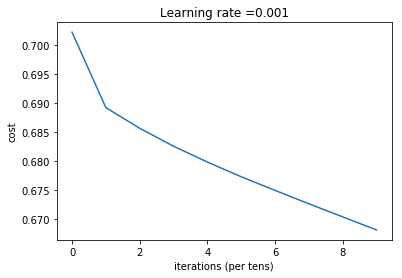

In [38]:
my_parameters = model(X_train, Y_train, layers_dims, epochs = 500, learning_rate = 0.001, print_cost = True)

This will take around 5 minutes. If your initial cost is not close to 0.702162, then there is something wrong. Your final cost should be 0.668156. Let's run this through the test data.

In [50]:
def test(X, Y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    P = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    total = 0
    # convert probas to 0/1 predictions
    for i in range(len(probas[0])):
        if probas[0][i] > 0.5:
            label = 1
        else:
            label = 0
        if label == Y[0][i]:
            total = total + 1
    accuracy = total / m
    
    print("Accuracy: "  + str(accuracy))

In [51]:
test(X_test, Y_test, my_parameters)

Accuracy: 0.5575


Notice how the accuracy is not very high. We will improve this in later assignments.

## 5. Test with your own image
Now you can try testing with your own image! Just save the image into this folder. First, we define a predict function:

In [52]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    
    return p

Next, you can imput your own image

Accuracy: 1.0
y = 0, your L-layer model predicts a "dog" picture.


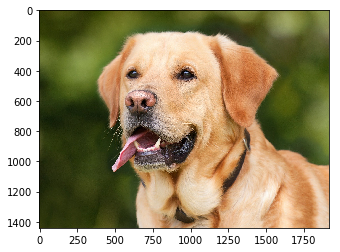

In [53]:
import scipy.misc
classes = ['dog', 'cat']
my_image = "my_image.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> dog)
## END CODE HERE ##

fname = "images/" + my_image
with open(my_image, 'rb') as file:
    image = np.array(Image.open(file))
    my_image = np.array(Image.fromarray(image).resize((128,128))).reshape((num_px*num_px*3,1))
    my_image = my_image/255.
    my_predicted_image = predict(my_image, my_label_y, my_parameters)
if my_predicted_image == [[0.]]:
    num = 0
else:
    num = 1
plt.imshow(image)
print (("y = " + str(num)) + ", your L-layer model predicts a \"" + classes[num] + "\" picture.")


Congrats on finishing this tutorial! Now you should be familiar with the different steps involved in a neural network. Notice how the cost is still pretty high. We can improve our algorithm by using techniques such as minibatches, dropout, and regularization. Let's continue to the next assignment!